In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Connecting, retrieving and joining data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/VU/ANN/train.csv'
path2 = '/content/drive/MyDrive/VU/ANN/oil.csv'
path3 = '/content/drive/MyDrive/VU/ANN/stores.csv'
path4 = '/content/drive/MyDrive/VU/ANN/holidays_events.csv'
path5 = '/content/drive/MyDrive/VU/ANN/test.csv'
train_df = pd.read_csv(path1)
oil_df = pd.read_csv(path2)
stores_df = pd.read_csv(path3)
holidays_events_df = pd.read_csv(path4)
test_df = pd.read_csv(path5)

# Preparing data:


Join all existing data:

In [ ]:
# Train:

# Merge train data with stores data based on "store_nbr"
merged_with_stores = train_df.merge(stores_df, on="store_nbr", how="left")

# Merge train data with stores data based on "store_nbr"
merged_with_oil = merged_with_stores.merge(oil_df, on="date", how="left")

# Merge the resulting data with holidays_events data based on "date"
merged_with_holidays = merged_with_oil.merge(holidays_events_df, on="date", how="left")
merged_with_holidays


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [ ]:
# Test_data:

# Merge test data with stores data based on "store_nbr"
test_merged_with_stores = test_df.merge(stores_df, on="store_nbr", how="left")

# Merge test data with stores data based on "store_nbr"
test_merged_with_oil = test_merged_with_stores.merge(oil_df, on="date", how="left")

# Merge the resulting data with holidays_events data based on "date"
test_merged_with_holidays = test_merged_with_oil.merge(holidays_events_df, on="date", how="left")
test_merged_with_holidays

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN,NaN,NaN


Encode holiday data into simpler form:

In [ ]:
# Train:

### Setting the holiday as 0 or 1 for each sample:

# Transferred holidays
condition_not_transferred = merged_with_holidays['transferred'] == False

# National holidays with not transferred condition
condition_national = (merged_with_holidays['locale'] == "National") & condition_not_transferred

# Regional holidays with not transferred condition
condition_regional = (merged_with_holidays['locale'] == "Regional") & \
                    (merged_with_holidays['locale_name'] == merged_with_holidays['state']) & \
                    condition_not_transferred

# Local holidays with not transferred condition
condition_local = (merged_with_holidays['locale'] == "Local") & \
                 (merged_with_holidays['locale_name'] == merged_with_holidays['city']) & \
                 condition_not_transferred

# Set the holiday flag based on the adjusted conditions
merged_with_holidays['holiday'] = 0  # Reset the 'holiday' column to 0
merged_with_holidays.loc[condition_national | condition_regional | condition_local, 'holiday'] = 1


# Rename columns
new_column_names = {
    'type_x': 'store_type',
    'type_y': 'event_type',
    'dcoilwtico': 'oil_price'
}

merged_with_holidays.rename(columns=new_column_names, inplace=True)

# Filter out rows with the date '2013-01-01'
merged_with_holidays = merged_with_holidays[merged_with_holidays['date'] != '2013-01-01']
# Update event_type against holiday category:

# if holiday = 0 then no event
merged_with_holidays.loc[merged_with_holidays['holiday'] == 0, 'event_type'] = "Nothing"

XY = merged_with_holidays.drop(columns=['locale', 'locale_name','description','transferred'])

In [ ]:
# Test:

### Setting the holiday as 0 or 1 for each sample:

# Transferred holidays
condition_not_transferred = test_merged_with_holidays['transferred'] == False

# National holidays with not transferred condition
condition_national = (test_merged_with_holidays['locale'] == "National") & condition_not_transferred

# Regional holidays with not transferred condition
condition_regional = (test_merged_with_holidays['locale'] == "Regional") & \
                    (test_merged_with_holidays['locale_name'] == test_merged_with_holidays['state']) & \
                    condition_not_transferred

# # Local holidays with not transferred condition
condition_local = (test_merged_with_holidays['locale'] == "Local") & \
                 (test_merged_with_holidays['locale_name'] == test_merged_with_holidays['city']) & \
                 condition_not_transferred

# Set the holiday flag based on the adjusted conditions
test_merged_with_holidays['holiday'] = 0  # Reset the 'holiday' column to 0
test_merged_with_holidays.loc[condition_national | condition_regional | condition_local, 'holiday'] = 1


# Rename columns
new_column_names = {
    'type_x': 'store_type',
    'type_y': 'event_type',
    'dcoilwtico': 'oil_price'
}

test_merged_with_holidays.rename(columns=new_column_names, inplace=True)


# Update event_type against holiday category:

# if holiday = 0 then no event
test_merged_with_holidays.loc[test_merged_with_holidays['holiday'] == 0, 'event_type'] = "Nothing"

XY_test = test_merged_with_holidays.drop(columns=['locale', 'locale_name','description','transferred'])

Interpolate missing values in oil prices:

In [ ]:
# Train:

# Fill in missing oil prices
XY['oil_price'].interpolate(method='linear', inplace=True)

# Assign the modified DataFrame to a new variable
XY = XY.copy()
XY

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,oil_price,event_type,holiday
1782,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13,93.14,Nothing,0
1783,1783,2013-01-02,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14,Nothing,0
1784,1784,2013-01-02,1,BEAUTY,2.000,0,Quito,Pichincha,D,13,93.14,Nothing,0
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0,Quito,Pichincha,D,13,93.14,Nothing,0
1786,1786,2013-01-02,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14,Nothing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Nothing,0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Nothing,0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Nothing,0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Nothing,0


In [ ]:
# Test:

# Fill in missing oil prices
XY_test['oil_price'].interpolate(method='linear', inplace=True)

# Assign the modified DataFrame to a new variable
XY_test = XY_test.copy()
XY_test

# Taking a look at the train/test sample lenghts:

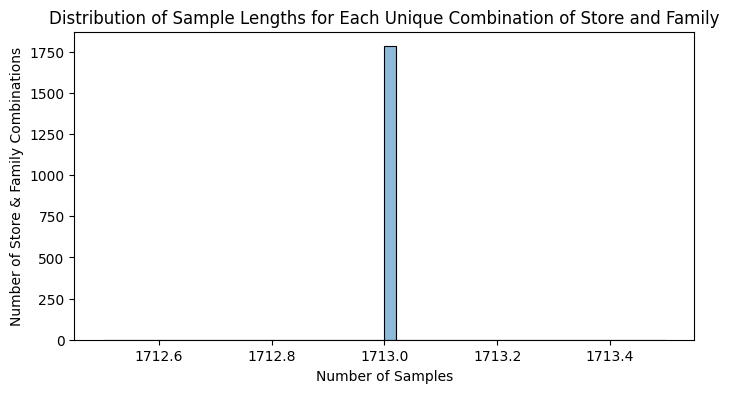

In [ ]:
# Train:

# Group by 'store_nbr' and 'family' and count the number of samples in each group
grouped = XY.groupby(['store_nbr', 'family']).size().reset_index(name='counts')

# Plot the distribution of counts
plt.figure(figsize=(8, 4))
sns.histplot(grouped['counts'], bins=50, kde=True)
plt.title('Distribution of Sample Lengths for Each Unique Combination of Store and Family')
plt.xlabel('Number of Samples')
plt.ylabel('Number of Store & Family Combinations')
plt.show()

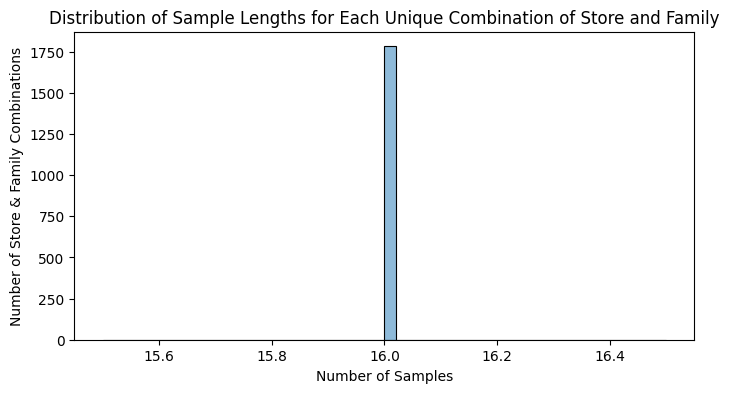

In [ ]:
# Test:

# Group by 'store_nbr' and 'family' and count the number of samples in each group
grouped = XY_test.groupby(['store_nbr', 'family']).size().reset_index(name='counts')

# Plot the distribution of counts
plt.figure(figsize=(8, 4))
sns.histplot(grouped['counts'], bins=50, kde=True)
plt.title('Distribution of Sample Lengths for Each Unique Combination of Store and Family')
plt.xlabel('Number of Samples')
plt.ylabel('Number of Store & Family Combinations')
plt.show()

Take a look at stores and their product count:

In [ ]:
# Train:

# Group by 'store_nbr' and count the number of unique values in the 'family' column
unique_families_per_store = XY.groupby('store_nbr')['family'].nunique().reset_index(name='unique_family_count')

# Display the results
print(unique_families_per_store)

In [ ]:
# Test:

# Group by 'store_nbr' and count the number of unique values in the 'family' column
unique_families_per_store = XY_test.groupby('store_nbr')['family'].nunique().reset_index(name='unique_family_count')

# Display the results
print(unique_families_per_store)

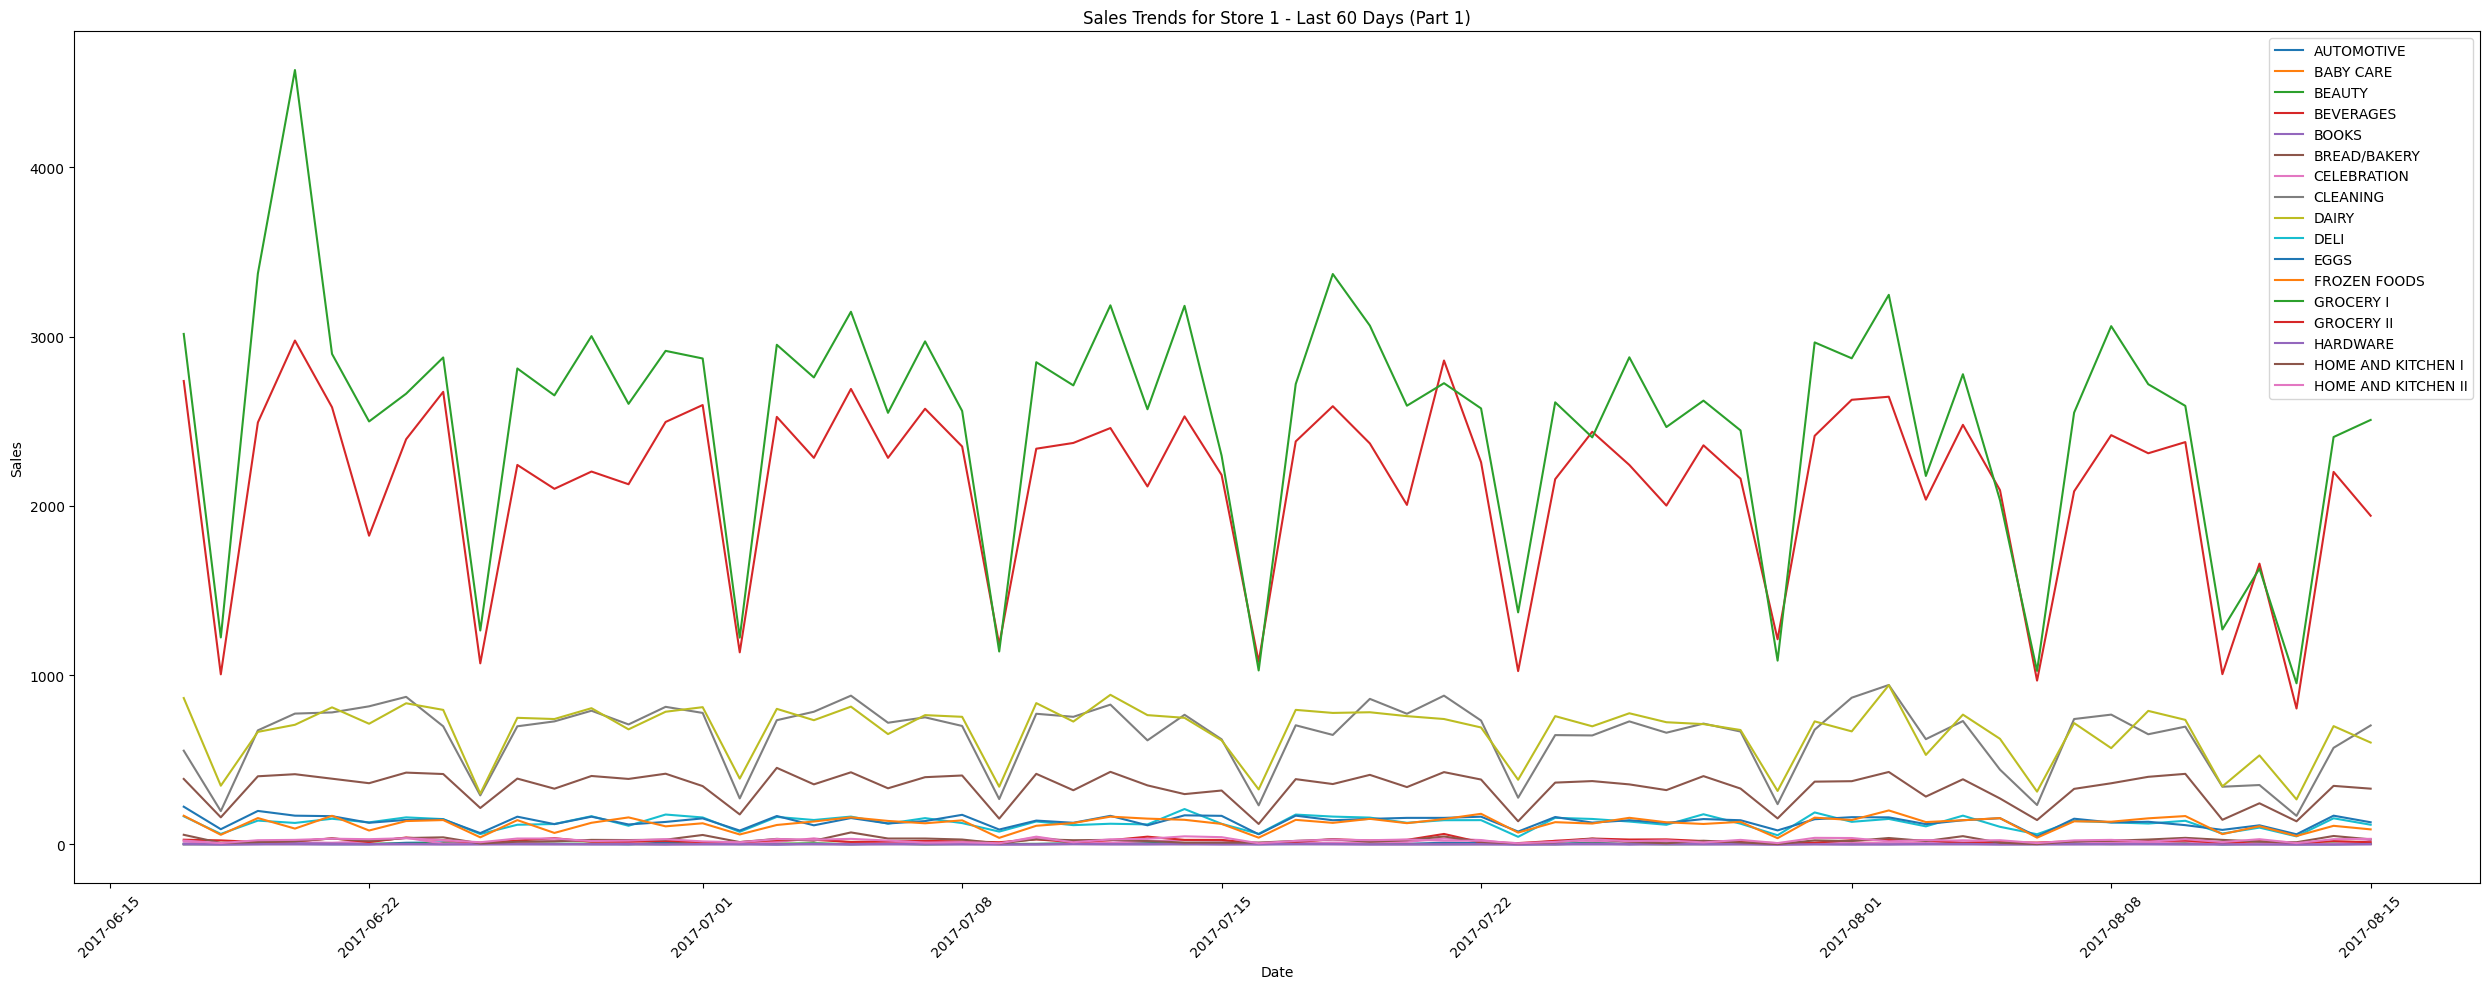

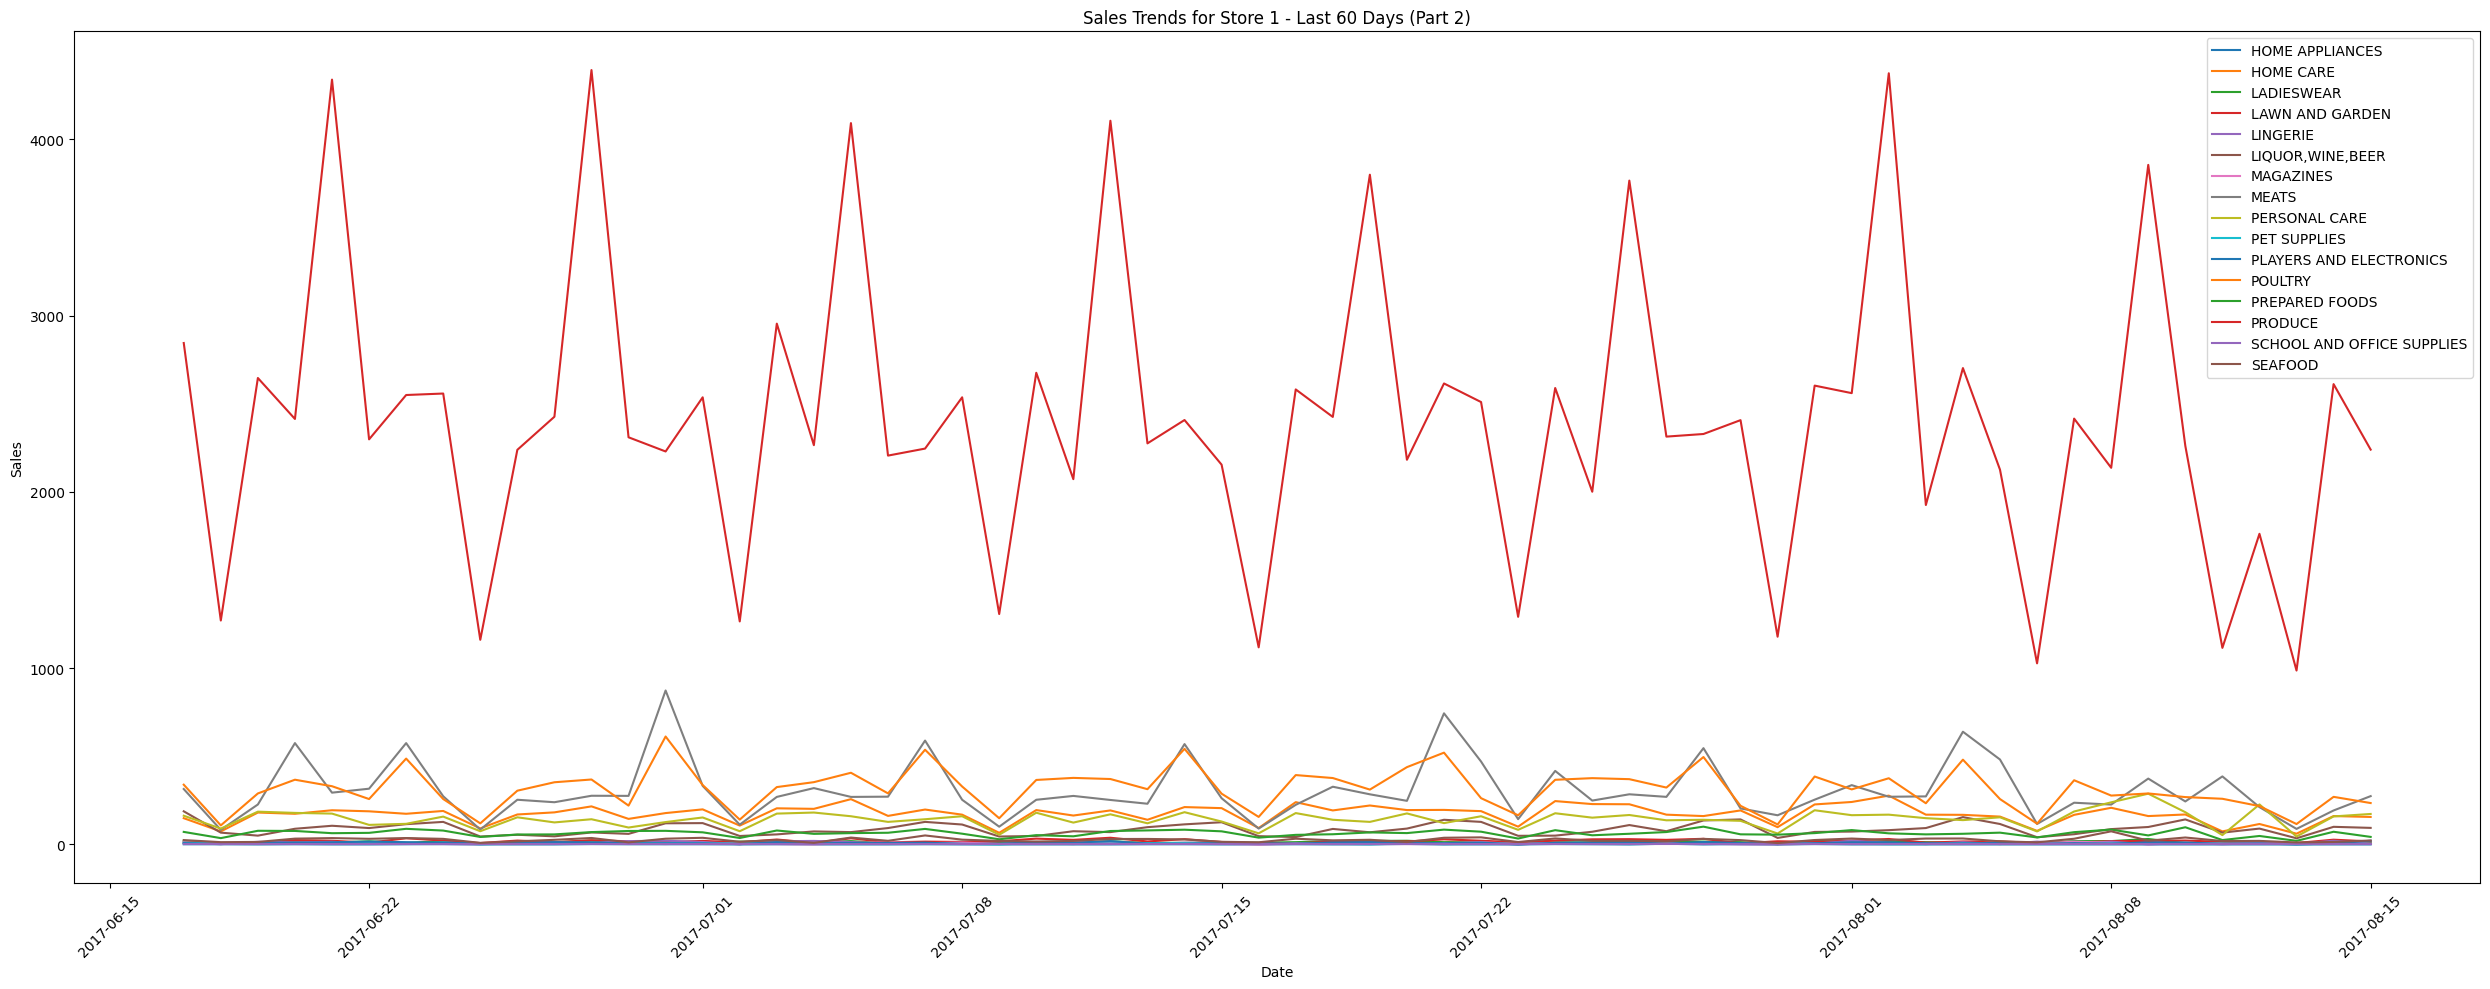

In [ ]:
##################
# Specify the store number
store_number = 1  # Replace with the store number you're interested in
##################


# Convert the 'date' column to datetime format
XY['date'] = pd.to_datetime(XY['date'])

# Sort the data by date, store number, and product family
sorted_data = XY.sort_values(by=['store_nbr', 'family', 'date'], ascending=[True, True, True])


# Filter the DataFrame for the specified store
store_df = sorted_data[sorted_data['store_nbr'] == store_number]

# First set of families
families1 = ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERY I',
 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II']

# Plotting for first set of families
plt.figure(figsize=(25, 10))
for family in families1:
    family_df = store_df[store_df['family'] == family]
    last_14_dates = family_df['date'].unique()[-60:]
    family_df = family_df[family_df['date'].isin(last_14_dates)]
    family_df = family_df.sort_values('date')
    plt.plot(family_df['date'], family_df['sales'], label=family)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Sales Trends for Store {store_number} - Last 60 Days (Part 1)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Second set of families
families2 = ['HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']

# Plotting for second set of families
plt.figure(figsize=(25, 10))
for family in families2:
    family_df = store_df[store_df['family'] == family]
    last_14_dates = family_df['date'].unique()[-60:]
    family_df = family_df[family_df['date'].isin(last_14_dates)]
    family_df = family_df.sort_values('date')
    plt.plot(family_df['date'], family_df['sales'], label=family)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Sales Trends for Store {store_number} - Last 60 Days (Part 2)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Continue with data prep:

Normalize anomaly period:

In [ ]:
## Date:
# Convert the 'date' column to datetime format
XY['date'] = pd.to_datetime(XY['date'])

## Sort:
# Sort the data by store number, product family and date
sorted_data = XY.sort_values(by=['store_nbr', 'family', 'date'], ascending=[True, True, True])



# Define families & stores for which you want to perform this operation                                      ### maybe this code can run with one less loop?
product_families_to_modify = ['GROCERY I', 'GROCERY II', 'HARDWARE', 'HOME CARE', 'PERSONAL CARE', 'BEVERAGES']
store_numbers = range(1, 55)

anomaly_start_date = pd.to_datetime('2016-04-10')
anomaly_end_date = pd.to_datetime('2016-05-15')
offset_days = pd.Timedelta(days=35)


# Add a new column to store the original index
sorted_data['original_index'] = sorted_data.index


# Filter for the relevant families and stores
filtered_data = sorted_data[sorted_data['family'].isin(product_families_to_modify) &
                            sorted_data['store_nbr'].isin(store_numbers)]

# Loop through each store and family
for store_nbr in store_numbers:
        # Filter data for specific store and family
        store_family_data = sorted_data[(sorted_data['store_nbr'] == store_nbr)]

        # Create a copy of the data for the offset interval
        offset_interval = store_family_data[(store_family_data['date'] >= (anomaly_start_date - offset_days)) &
                                            (store_family_data['date'] <= (anomaly_end_date - offset_days))].copy()

        # Shift the dates in the offset interval
        offset_interval['date'] += offset_days

        # Merge the offset data with the anomaly interval data
        merged_data = pd.merge(store_family_data, offset_interval[['date', 'sales', 'family']], on=['date', 'family'], how='left', suffixes=('', '_offset'))

        # Check if the 'sales_offset' column has non-null values and replace 'sales' with 'sales_offset' values
        merged_data.loc[merged_data['sales_offset'].notnull(), 'sales'] = merged_data['sales_offset']

        # Drop the 'sales_offset' column as it's no longer needed
        merged_data.drop('sales_offset', axis=1, inplace=True)

        # Perform a left join on the original index to transfer the new sales column to sorted_data
        sorted_data = pd.merge(sorted_data, merged_data[['original_index', 'sales']], on='original_index', how='left', suffixes=('', '_new'))

        # Replace the 'sales' column in the original DataFrame with the new 'sales' column
        sorted_data.loc[sorted_data['sales_new'].notnull(), 'sales'] = sorted_data['sales_new']

        # Drop the 'sales_new' column as it's no longer needed
        sorted_data.drop('sales_new', axis=1, inplace=True)


sorted_data.drop('original_index', axis=1, inplace=True)

In [ ]:
##################
# Specify the store number
store_number = 54  # Replace with the store number you're interested in
##################

# Specify the date range
start_date = pd.to_datetime('2015-06-01')  # Replace with your start date
end_date = pd.to_datetime('2017-07-30')  # Replace with your end date

# Filter the DataFrame for the specified store
store_df = sorted_data[sorted_data['store_nbr'] == store_number]

# First set of families
families1 = ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERY I',
 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II']

# Plotting for first set of families
plt.figure(figsize=(25, 10))
for family in families1:
    family_df = store_df[store_df['family'] == family]
    family_df = family_df[(family_df['date'] >= start_date) & (family_df['date'] <= end_date)]
    family_df = family_df.sort_values('date')
    plt.plot(family_df['date'], family_df['sales'], label=family)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Sales Trends for Store {store_number} - {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} (Part 1)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Second set of families
families2 = ['HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']

# Plotting for second set of families
plt.figure(figsize=(25, 10))
for family in families2:
    family_df = store_df[store_df['family'] == family]
    family_df = family_df[(family_df['date'] >= start_date) & (family_df['date'] <= end_date)]
    family_df = family_df.sort_values('date')
    plt.plot(family_df['date'], family_df['sales'], label=family)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Sales Trends for Store {store_number} - {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} (Part 2)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Trigonometric & one-hot encoding

In [ ]:
# Train:

## Final touches:

## Date:
# Convert the 'date' column to datetime format
XY['date'] = pd.to_datetime(XY['date'])

## Sort:
# Sort the data by store number, product family and date
sorted_data = XY.sort_values(by=['store_nbr', 'family', 'date'], ascending=[True, True, True])

# Now, apply cyclic encoding for month and day
sorted_data['month_sin'] = np.sin((sorted_data['date'].dt.month-1) * (2.*np.pi/12))
sorted_data['month_cos'] = np.cos((sorted_data['date'].dt.month-1) * (2.*np.pi/12))
sorted_data['day_sin'] = np.sin((sorted_data['date'].dt.day-1) * (2.*np.pi/31))
sorted_data['day_cos'] = np.cos((sorted_data['date'].dt.day-1) * (2.*np.pi/31))

# Drop the original 'date' column
sorted_data.drop('date', axis=1, inplace=True)

# Pop out the target data:
Y = sorted_data['sales']

# One-hot encode the categorical features
categorical_features = ['family', 'city', 'state', 'event_type', 'store_type']

# Convert columns to category type
for col in categorical_features:
    sorted_data[col] = sorted_data[col].astype('category')

# One-hot encode with sparse representation
encoded_train_data = pd.get_dummies(sorted_data, columns=categorical_features, drop_first=True, sparse=True)

# List of columns to normalize
columns_to_normalize = ['store_nbr', 'onpromotion', 'cluster', 'holiday', 'oil_price', 'sales']

# Apply StandardScaler to these columns
scaler = StandardScaler()
encoded_train_data[columns_to_normalize] = scaler.fit_transform(encoded_train_data[columns_to_normalize])



# Check for null values
if encoded_train_data.isnull().any().any():
    print("There are null values in training data")
else:
    print("There are no null values in training data")

There are no null values in training data


In [ ]:
# Test:

## Final touches:

## Date:
# Convert the 'date' column to datetime format
XY_test['date'] = pd.to_datetime(XY_test['date'])

## Sort:
# Sort the data by date, store number, and product family
sorted_data = XY_test.sort_values(by=['store_nbr', 'family', 'date'], ascending=[True, True, True])


# Now, apply cyclic encoding for month and day
sorted_data['month_sin'] = np.sin((sorted_data['date'].dt.month-1) * (2.*np.pi/12))
sorted_data['month_cos'] = np.cos((sorted_data['date'].dt.month-1) * (2.*np.pi/12))
sorted_data['day_sin'] = np.sin((sorted_data['date'].dt.day-1) * (2.*np.pi/31))
sorted_data['day_cos'] = np.cos((sorted_data['date'].dt.day-1) * (2.*np.pi/31))

# Drop the original 'date' column
sorted_data.drop('date', axis=1, inplace=True)

# One-hot encode the categorical features
categorical_features = ['family', 'city', 'state', 'event_type', 'store_type']

# Convert columns to category type
for col in categorical_features:
    sorted_data[col] = sorted_data[col].astype('category')

# One-hot encode with sparse representation
encoded_test_data = pd.get_dummies(sorted_data, columns=categorical_features, drop_first=True, sparse=True)

# List of columns to normalize
columns_to_normalize = ['store_nbr', 'onpromotion', 'cluster', 'holiday', 'oil_price']

# Apply StandardScaler to these columns
scaler = StandardScaler()
encoded_test_data[columns_to_normalize] = scaler.fit_transform(encoded_test_data[columns_to_normalize])

# Check for null values
if encoded_test_data.isnull().any().any():
    print("There are null values in test data")
else:
    print("There are no null values in test data")

There are no null values in test data


Ensure both sets have the same one encoded value columns:

In [ ]:
# Get missing columns in the test set
missing_cols = set(encoded_train_data.columns) - set(encoded_test_data.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    encoded_test_data[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
encoded_test_data = encoded_test_data[encoded_train_data.columns]


print(encoded_test_data.shape)
print(encoded_train_data.shape)

(28512, 88)
(3052566, 88)


#Export Data:

In [ ]:
# Train:


# Add the Y target back to the dataframe and rename normalized sales:
encoded_train_data = encoded_train_data.rename(columns={'sales': 'normalized_sales'})
encoded_train_data['sales'] = Y

encoded_train_data.to_csv("/content/drive/MyDrive/VU/ANN/prepared_train_data.csv", index=False)   # ~3 min

<ipython-input-52-7093a396a774>:8: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  encoded_train_data.to_csv("/content/drive/MyDrive/VU/ANN/prepared_train_data.csv", index=False)   # ~3 min


In [ ]:
# Test:

encoded_test_data.to_csv("/content/drive/MyDrive/VU/ANN/prepared_test_data.csv", index=False)

<ipython-input-28-03cdaa5d0a89>:3: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  encoded_test_data.to_csv("/content/drive/MyDrive/VU/ANN/prepared_test_data.csv", index=False)
